In [60]:
from keras.datasets import mnist
import numpy as np

In [61]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
X = np.concatenate((x_train,x_test), axis=0)
y = np.concatenate((y_train,y_test), axis=0)

In [63]:
def Func(image):
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] >= 127:
                image[i][j] = 1
            else:
                image[i][j] = 0
    return image

In [64]:
import random
etalons = []
for i in range(10):
    index = random.choice(np.argwhere(y == i))[0]
    etalons.append(Func(X[index]))

Text(0.5, 1.0, 'etalon xor noise')

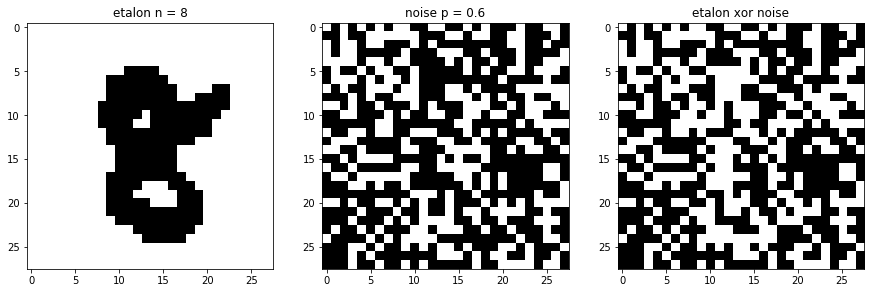

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols = 3, figsize = (15,5))

n = 8
axes[0].imshow(etalons[n], cmap = 'binary')
axes[0].set_title("etalon n = {}".format(n))

p = 0.6
noise = np.array(np.random.choice([0,1], size = (28,28), p = [1-p,p]), dtype = "uint8")
axes[1].imshow(noise, cmap = 'binary')
axes[1].set_title("noise p = {}".format(p))

axes[2].imshow(etalons[n] ^ noise, cmap = 'binary')
axes[2].set_title("etalon xor noise")

In [66]:
vec = []
for k in range(10):
    s = 0
    for i in range(28):
        for j in range(28):
            s += (etalons[n][i][j] ^ noise[i][j] ^ etalons[k][i][j]) * np.log(p) + (1 ^ etalons[n][i][j] ^ noise[i][j] ^ etalons[k][i][j]) * np.log(1 - p)
    vec.append(s)

print("Recognition result:", np.argmax(vec))

Recognition result: 8


In [67]:
vec

[-553.3476347893082,
 -544.4274024109287,
 -544.0219373028206,
 -546.4547279514695,
 -547.2656581676858,
 -550.9148441406593,
 -546.0492628433614,
 -544.8328675190369,
 -531.4525189514677,
 -546.0492628433614]